Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
def ReadFile(filename):
    for ix in range(len(filename)):
        dft = pd.read_excel(filename,skiprows = ix ,usecols = list(range(25)))
        if dft.iloc[0,0] == 'Fecha':
            dft = pd.read_excel(filename,skiprows = ix+1, usecols = list(range(25)))
            break
    return dft

In [3]:
df = []
for f in glob.glob("*.xls"):
    df.append(ReadFile(f))
for f in glob.glob("*.xlsx"):
    df.append(ReadFile(f))
df = pd.concat(df)
df = pd.melt(df,id_vars = 'Fecha')
df.columns = ['Fecha','Hora','Precio']
df.head(10)

,Fecha,Hora,Precio
0,2016-01-01,0,480.753675
1,2016-01-02,0,388.169584
2,2016-01-03,0,585.620874
3,2016-01-04,0,447.349303
4,2016-01-05,0,456.671402
5,2016-01-06,0,641.621628
6,2016-01-07,0,546.620874
7,2016-01-08,0,522.886440
8,2016-01-09,0,517.013128
9,2016-01-10,0,541.658402


**2.--** Compute e imprima el número de registros con datos faltantes.

In [4]:
df.isnull().sum().sum()

454

**3.--** Compute e imprima el número de registros duplicados.

In [5]:
df.duplicated().sum()

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [6]:
df = df.drop_duplicates()
df = df.dropna()
print(len(df))

199819


**5.--** Compute y grafique el precio primedio diario.

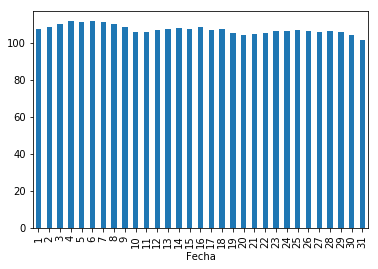

In [7]:
dia = df.groupby(pd.DatetimeIndex(df['Fecha']).day)['Precio'].mean()
dia.plot(kind="bar")

**6.--** Compute y grafique el precio máximo por mes.

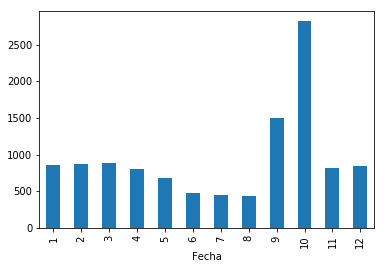

In [8]:
mes = df.groupby(pd.DatetimeIndex(df['Fecha']).month)['Precio'].max()
mes.plot(kind="bar")

**7.--** Compute y grafique el precio mínimo mensual.

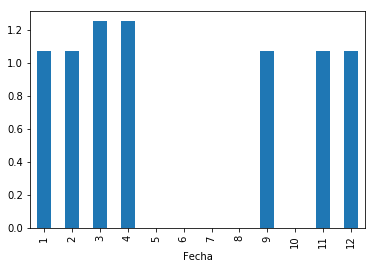

In [9]:
preciomin = df.groupby(pd.DatetimeIndex(df['Fecha']).month)['Precio'].min()
preciomin.plot(kind="bar")

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

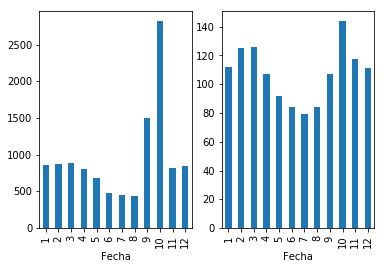

In [10]:
mesunit = df.groupby(pd.DatetimeIndex(df['Fecha']).month)['Precio'].max()
mestota = df.groupby(pd.DatetimeIndex(df['Fecha']).month)['Precio'].mean()
imagen, eje = plt.subplots(nrows=1, ncols=2)
mesunit.plot(kind="bar", ax=eje[0])
mestota.plot(kind="bar", ax=eje[1])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Text(0,0.5,'Valor hora')

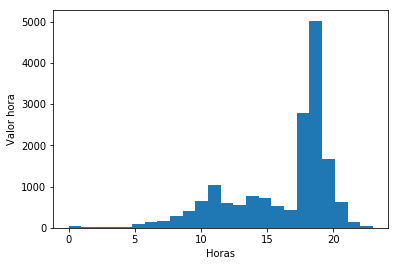

In [11]:
histoHoras = df.copy()
histoHoras['SemDia'] = [i.weekday() for i in pd.to_datetime(df['Fecha'])]
histoHoras = histoHoras[histoHoras['SemDia'] <= 4]
histoHoras2 = histoHoras.groupby('Fecha')['Precio'].max()
histoHoras2 = pd.DataFrame({'Fecha':histoHoras2.index, 'PrecioMax':histoHoras2.values})
histoHoras['Fecha'] = pd.to_datetime(histoHoras['Fecha'])
histoHoras2 = pd.merge(histoHoras, histoHoras2, on=['Fecha'], how='inner')
histoHoras2 = histoHoras2[histoHoras2['Precio'] == histoHoras2['PrecioMax']]
listHoras = list(map(int,histoHoras2['Hora'].tolist()))
plt.hist(listHoras, bins=24)
plt.xlabel('Horas')
plt.ylabel('Valor hora')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0,0.5,'Valor hora')

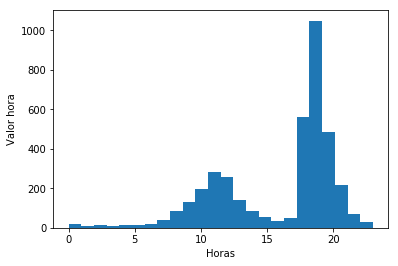

In [12]:
histoHoras = df.copy()
histoHoras['SemDia'] = [i.weekday() for i in pd.to_datetime(df['Fecha'])]
histoHoras = histoHoras[histoHoras['SemDia'] == 5]
histoHoras2 = histoHoras.groupby('Fecha')['Precio'].max()
histoHoras2 = pd.DataFrame({'Fecha':histoHoras2.index, 'PrecioMax':histoHoras2.values})
histoHoras['Fecha'] = pd.to_datetime(histoHoras['Fecha'])
histoHoras2 = pd.merge(histoHoras, histoHoras2, on=['Fecha'], how='inner')
histoHoras2 = histoHoras2[histoHoras2['Precio'] == histoHoras2['PrecioMax']]
listHoras = list(map(int,histoHoras2['Hora'].tolist()))
plt.hist(listHoras, bins=24)
plt.xlabel('Horas')
plt.ylabel('Valor hora')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0,0.5,'Valor hora')

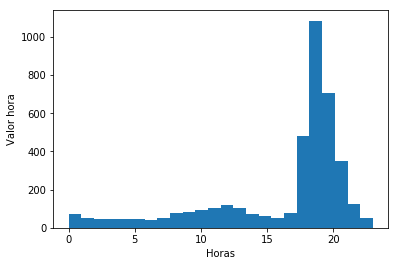

In [13]:
histoHoras = df.copy()
histoHoras['SemDia'] = [i.weekday() for i in pd.to_datetime(df['Fecha'])]
histoHoras = histoHoras[histoHoras['SemDia'] == 6]
histoHoras2 = histoHoras.groupby('Fecha')['Precio'].max()
histoHoras2 = pd.DataFrame({'Fecha':histoHoras2.index, 'PrecioMax':histoHoras2.values})
histoHoras['Fecha'] = pd.to_datetime(histoHoras['Fecha'])
histoHoras2 = pd.merge(histoHoras, histoHoras2, on=['Fecha'], how='inner')
histoHoras2 = histoHoras2[histoHoras2['Precio'] == histoHoras2['PrecioMax']]
listHoras = list(map(int,histoHoras2['Hora'].tolist()))
plt.hist(listHoras, bins=24)
plt.xlabel('Horas')
plt.ylabel('Valor hora')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [14]:
dfBolsa = df.copy()
dfBolsa['ano'] = [a.year for a in pd.to_datetime(df['Fecha'])]
dfBolsa = pd.merge(dfBolsa.groupby('ano')['Precio'].min(), dfBolsa, on=['ano'], how='inner')
dfBolsa = dfBolsa.drop(["Precio_x", "Hora"], axis=1)
dfBolsa.columns = ["Año", "Fecha", "Precio"]
dfBolsa.head(10)

,Año,Fecha,Precio
0,1995,1995-07-21,1.073
1,1995,1995-07-22,1.073
2,1995,1995-07-23,1.073
3,1995,1995-07-24,1.000
4,1995,1995-07-25,0.990
5,1995,1995-07-26,0.500
6,1995,1995-07-27,0.500
7,1995,1995-07-28,0.000
8,1995,1995-07-29,1.000
9,1995,1995-07-30,1.072


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---